## Exercise 1

### a)

The posterior mean for a prior uniform distribution is: 5.636364
The posterior median is: 5.60609
The posterior variance is: 0.5123967

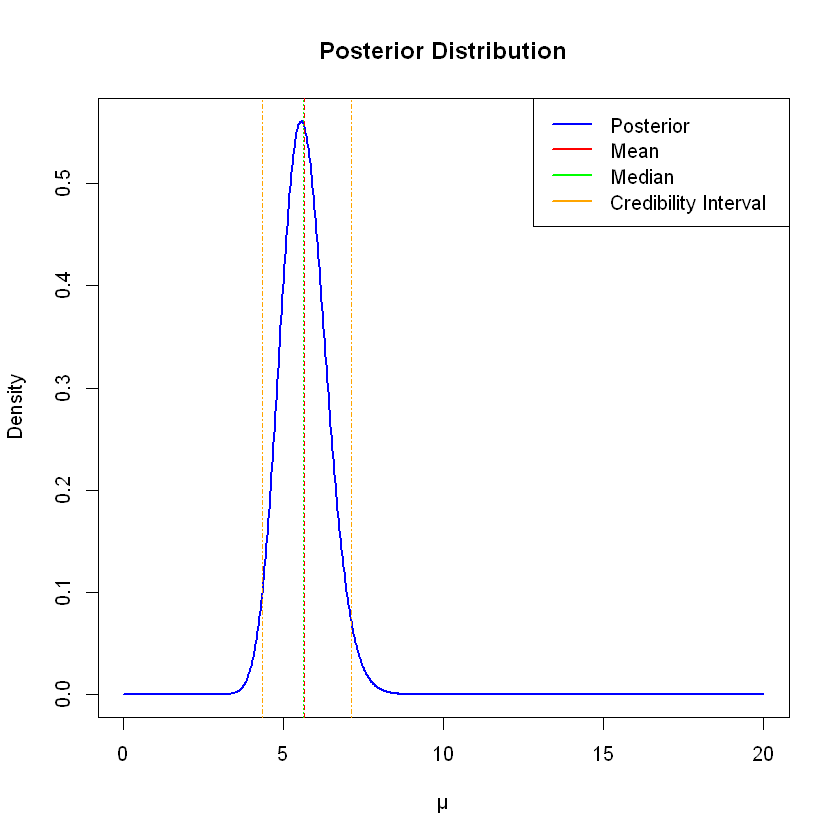

In [7]:
# observed data
x <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n <- length(x)

# prior distribution
a <- 0
b <- 20

# posterior distribution
alpha <- sum(x) + 1
beta <- n + 1
mu <- seq(a, b, length.out = 1000)
posterior <- dgamma(mu, shape = alpha, rate = beta)

# posterior mean, median, variance
posterior_mean <- alpha / beta
posterior_median <- qgamma(0.5, shape = alpha, rate = beta)
posterior_var <- alpha / beta^2
cat("The posterior mean for a prior uniform distribution is:", posterior_mean)
cat("\nThe posterior median is:", posterior_median)
cat("\nThe posterior variance is:", posterior_var)

# credibility interval
lower_bound <- qgamma(0.025, shape = alpha, rate = beta)
upper_bound <- qgamma(0.975, shape = alpha, rate = beta)

# plot posterior distribution and credibility interval
plot(mu, posterior, type = "l", col = "blue", lwd = 2, xlab = "µ", ylab = "Density", main = "Posterior Distribution")
abline(v = posterior_mean, lty = 2, col = "red")
abline(v = posterior_median, lty = 3, col = "green")
abline(v = c(lower_bound, upper_bound), lty = 4, col = "orange")
legend("topright", legend = c("Posterior", "Mean", "Median", "Credibility Interval"), col = c("blue", "red", "green", "orange"), lwd = 2)

The posterior mean for a prior uniform distribution is: 5.636364
The posterior median is: 5.60609
The posterior variance is: 0.5123967

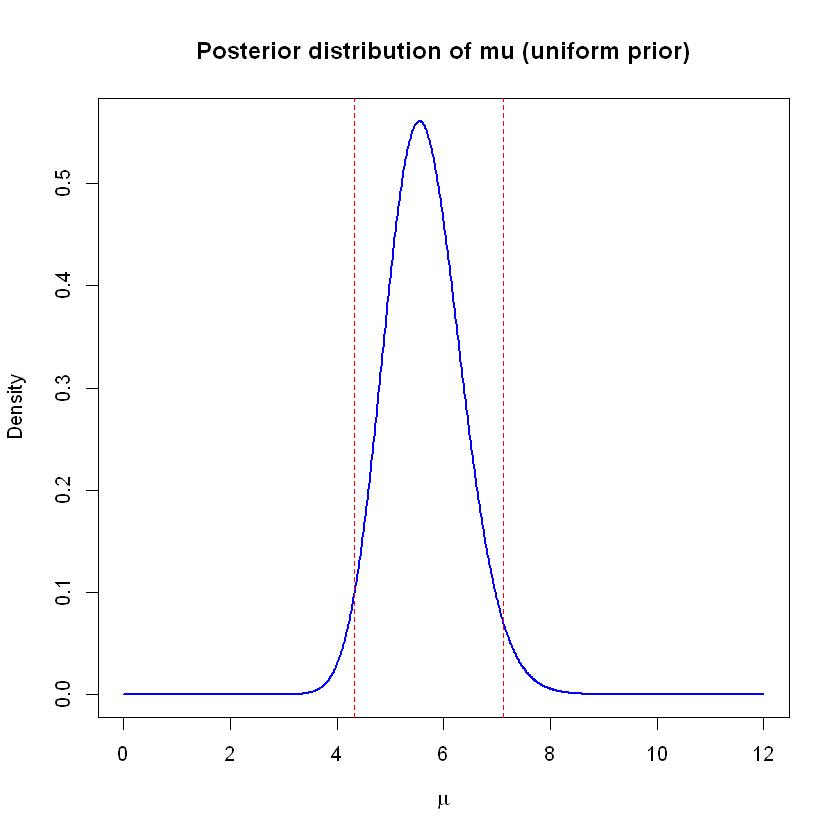

In [21]:
# Observed data
y <- c(5, 8, 4, 6, 11, 6, 6, 5, 6, 4)
n <- length(y)

# Prior: Uniform distribution
a <- 1
b <- 1
# Posterior distribution
a.post1 <- a + sum(y)
b.post1 <- b + n
# Posterior mean
mean.post <- a.post1 / b.post1
# Posterior median
median.post <- qgamma(0.5, shape = a.post1, rate = b.post1)
# Posterior variance
var.post <- a.post1 / (b.post1^2)
cat("The posterior mean for a prior uniform distribution is:", mean.post)
cat("\nThe posterior median is:", median.post)
cat("\nThe posterior variance is:", var.post)

# Plot
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post1, rate = b.post1)
plot(x, y, type="l", col='blue', lwd = 2, xlab=expression(mu), ylab="Density", main="Posterior distribution of mu (uniform prior)")
abline(v = qgamma(c(0.025,0.975), shape = a.post1, rate = b.post1),col='red', lty=2)

### b)

The posterior mean for a Jeffrey's prior is: 8.375
The posterior median is: 5.60609
The posterior variance is: 0.5123967

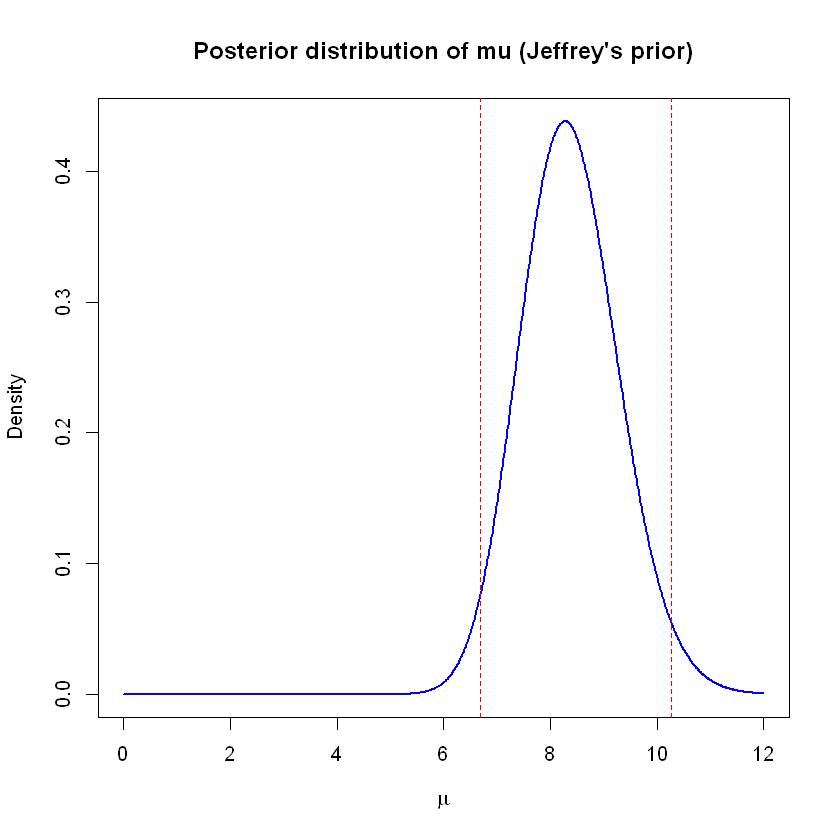

In [22]:
# Jeffreys' prior
a <- 0.5
b <- 0
# posterior distribution
a.post2 <- a + sum(y)
b.post2 <- b + n
# posterior mean
mean.post <- a.post2 / b.post2
# posterior median
median.post <- qgamma(0.5, shape = a.post, rate = b.post)
# posterior variance
var.post <- a.post2 / (b.post2^2)
cat("The posterior mean for a Jeffrey's prior is:", mean.post)
cat("\nThe posterior median is:", median.post)
cat("\nThe posterior variance is:", var.pos)

# Plot
x <- seq(0, 12, length.out = 1000)
y <- dgamma(x, shape = a.post2, rate = b.post2)
plot(x, y, type="l", col='blue', lwd = 2, xlab=expression(mu), ylab="Density", main="Posterior distribution of mu (Jeffrey's prior)")
abline(v = qgamma(c(0.025,0.975), shape = a.post2, rate = b.post2),col='red', lty=2)

### c)

In [24]:
# 95% credibility interval for Uniform prior
ci.uniform <- qgamma(c(0.025,0.975), shape = a.post1, rate = b.post1)

# 95% credibility interval for Jeffrey's prior
ci.jeffreys <- qgamma(c(0.025,0.975), shape = a.post2, rate = b.post2)

# normal approximation (with critical values for a 95% confidence interval)
sd.norm <- sd(y)
# standard error of the mean
sd.error <- sd.norm/sqrt(n)
ci.norm <- mean.norm + c(-1.96,1.96)*sd.error

cat("95% credibility interval using uniform prior:", ci.uniform, "\n")
cat("95% credibility interval using Jeffreys' prior:", ci.jeffreys, "\n")
cat("95% confidence interval using normal approximation:", ci.norm)

95% credibility interval using uniform prior: 4.321368 7.123368 
95% credibility interval using Jeffreys' prior: 6.677847 10.26142 
95% confidence interval using normal approximation: -0.00190474 0.1683716

## Exercise 2

### a)

Let `H` be the event of a patient having the disease, and `F` be the event of the new method failing to detect the disease. We know that `P(F|H) = 0.15`. Therefore, `P(D|H) = 0.85`, i.e., the probability of detecting the disease (event `D`) given that the patient has the disease.

A random sample of `n = 75` patients known to have the disease is screened using the new method. Let `Y` be the number of times the new method fails to detect the disease in this sample. Then `Y` has a **binomial** distribution with parameters `n = 75` and `p = 0.15`.

In [27]:
#number of trials
n <- 75
p <- 0.15
#number of failures
y <- 0:n
# probability distribution of failure
prob_y <- dbinom(y, size = n, prob = p)

### b)

If `y` is the number of patients in which the method fails to detect the disease and `n` is the total number of patients in the sample, then the frequentist estimator of the failure probability is given by:
$ \hat{p}=\frac{y}{n} $

In [ ]:
y <- 6
# failure probability (frequentist estimator) 
p_hat <- y/n
p_hat

### c)

Warning message in dbeta(seq(0, 1, by = 0.001), alpha + y, beta + n - y):
"Si è prodotto un NaN"


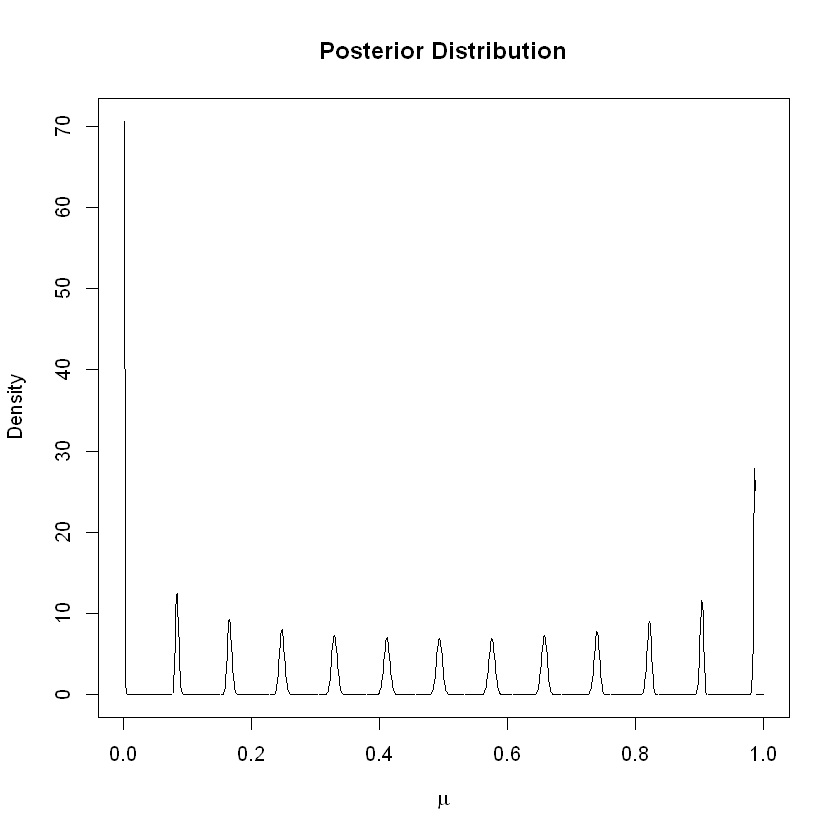

In [39]:
# Prior distribution
mu <- 0.15 
var <- 0.14 
alpha <- ((1 - mu) / var - 1 / mu) * mu ^ 2 
beta <- alpha * (1 / mu - 1) 
# Likelihood function 
likelihood <- dbinom(y, n, mu) 
# Posterior distribution 
posterior <- dbeta(seq(0, 1, by = 0.001), alpha + y, beta + n - y)
# Calculate mean and variance of posterior distribution
posterior_mean <- mean(posterior) 
posterior_var <- var(posterior) 
# Plot posterior distribution
plot(seq(0, 1, by = 0.001), posterior, type = "l", xlab = expression(mu), ylab = "Density", main = "Posterior Distribution") 
# Add vertical line for posterior mean 
abline(v = posterior_mean, col = "red") 
# Add text for posterior variance
text(x = posterior_mean - 0.06, y = max(posterior) - 0.05, labels = paste0("Variance = ", round(posterior_var, 3)), col = "red")

Warning message in dbeta(p, alpha + y, beta + n - y):
"Si è prodotto un NaN"
Warning message in dbeta(p, alpha + y, beta + n - y):
"Si è prodotto un NaN"


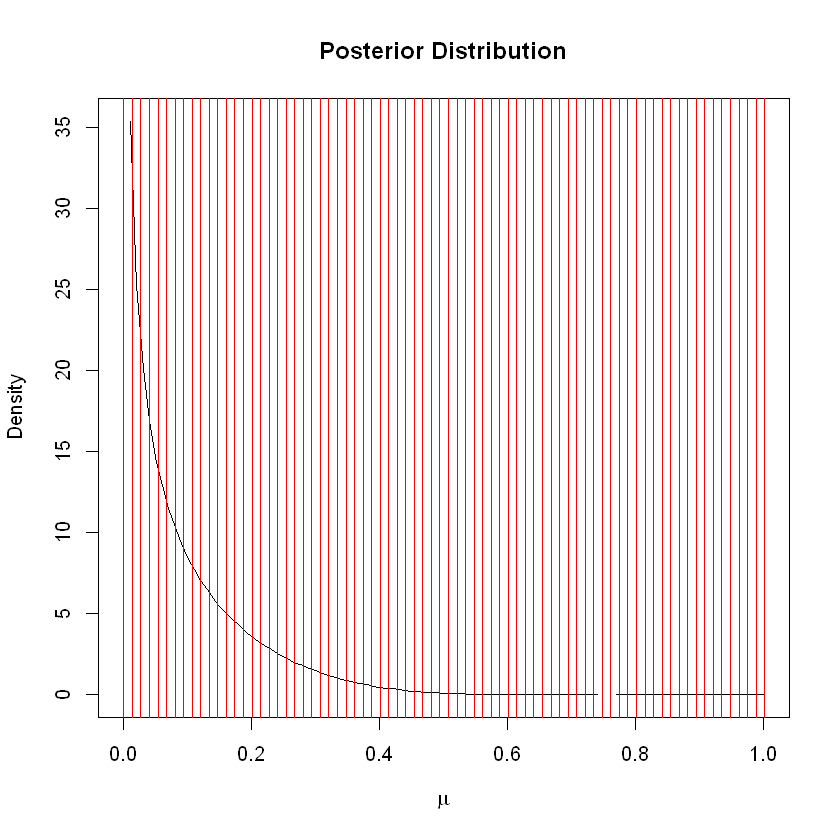

In [36]:
# Prior distribution
mu <- 0.15
var <- 0.14
alpha <- mu * (mu * (1 - mu) / var - 1)
beta <- alpha * (1 / mu - 1)

# Likelihood function
likelihood <- dbinom(y, n, mu)

# Posterior distribution
posterior <- function(p) {
  dbeta(p, alpha + y, beta + n - y)
}

# Calculate mean and variance of posterior distribution
posterior_mean <- (alpha + y) / (alpha + beta + n)
posterior_var <- (alpha + y) * (beta + n - y) / ((alpha + beta + n)^2 * (alpha + beta + n + 1))

# Plot posterior distribution
curve(posterior, from = 0, to = 1, xlab = expression(mu), ylab = "Density", main = "Posterior Distribution")

# Add vertical line for posterior mean
abline(v = posterior_mean, col = "red")

# Add text for posterior variance
text(x = posterior_mean - 0.06, y = max(posterior(seq(0, 1, by = 0.001))) - 0.05, labels = paste0("Variance = ", round(posterior_var, 3)), col = "red")